## Sampling from a Biased Population
In this tutorial we will go over some code that recreates the visualizations in the Interactive Sampling Distribution Demo. This demo looks at a hypothetical problem that illustrates what happens when we sample from a biased population and not the entire population we are interested in. This tutorial assumes that you have seen that demo, for context, and understand the statistics behind the graphs. 

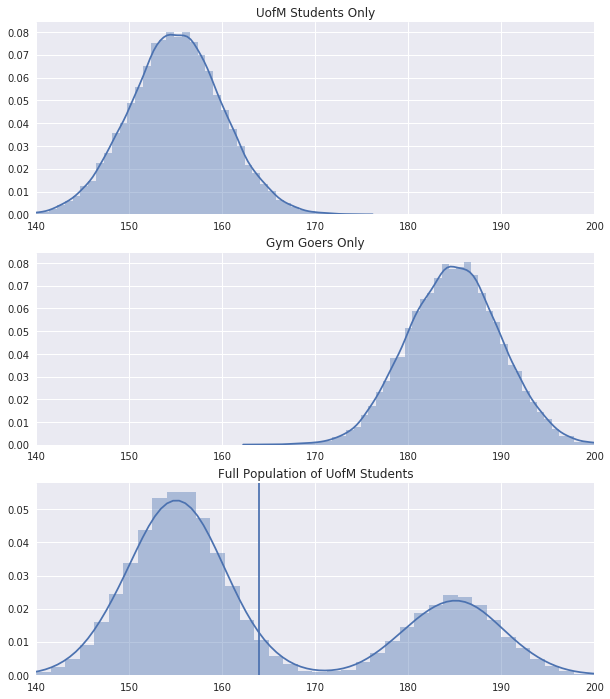

In [3]:
# Import the packages that we will be using for the tutorial
import numpy as np # for sampling for the distributions
import matplotlib.pyplot as plt # for basic plotting 
import seaborn as sns; sns.set() # for plotting of the histograms

import warnings
warnings.filterwarnings("ignore")

# Recreate the simulations from the video 
mean_uofm = 155
sd_uofm = 5
mean_gym = 185 
sd_gym = 5 
gymperc = .3
totalPopSize = 40000

# Create the two subgroups
uofm_students = np.random.normal(mean_uofm, sd_uofm, int(totalPopSize * (1 - gymperc)))# students don't go gym
students_at_gym = np.random.normal(mean_gym, sd_gym, int(totalPopSize * (gymperc)))# students go gym

# Create the population from the subgroups
population = np.append(uofm_students, students_at_gym)

# Set up the figure for plotting
plt.figure(figsize=(10,12))

# Plot the UofM students only
plt.subplot(3,1,1)
sns.distplot(uofm_students)
plt.title("UofM Students Only")
plt.xlim([140,200]) # keep x-axis from 140 to 200

# Plot the Gym Goers only
plt.subplot(3,1,2)
sns.distplot(students_at_gym)
plt.title("Gym Goers Only")
plt.xlim([140,200])

# Plot both groups together, 30% students go to gym, 70% students don't go gym
plt.subplot(3,1,3)
sns.distplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population)) # drwa a vertical line, blue line below
plt.xlim([140,200])

plt.show()

## What Happens if We Sample from the Entire Population?
We will sample randomly from all students at the University of Michigan.

In [4]:
# the function of np.empty()
a=np.empty(5)
a

array([ 1. ,  2. ,  2.5,  5. , 10. ])

In [7]:
# function of xrange
for i in xrange(5):
    print (i)

0
1
2
3
4


In [8]:
# the function of "np.random.choice"
x=[1,2,3,4,5,6,7,8,9]
a=np.random.choice(x, 3)
a

array([9, 6, 1])

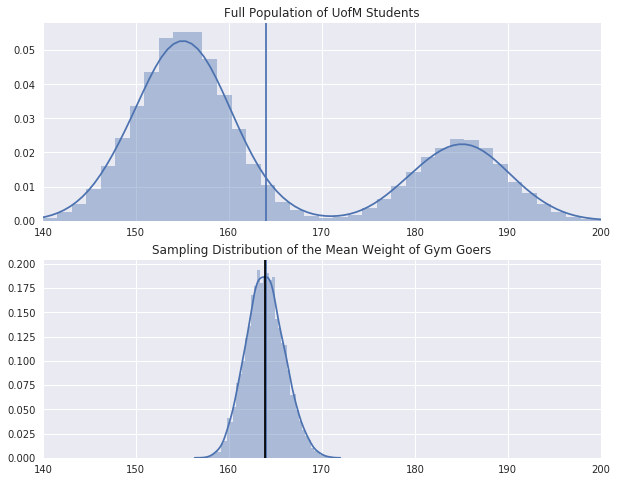

In [10]:
# Simulation parameters
numberSamps = 5000 # sample 5000 times
sampSize = 50 # sample 50 individuals from overall population

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in xrange(numberSamps):
    random_students = np.random.choice(population, sampSize)
    mean_distribution[i] = np.mean(random_students)
    
# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plotting the population again
plt.subplot(2,1,1)
sns.distplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

# Plotting the sampling distribution
plt.subplot(2,1,2)
sns.distplot(mean_distribution)
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(mean_distribution), color = "black")
plt.xlim([140,200])

plt.show()

## What Happens if We take a Non-Representative Sample?
What happens if I only go to the gym to get the weight of individuals, and I don't sample randomly from all students at the University of Michigan?

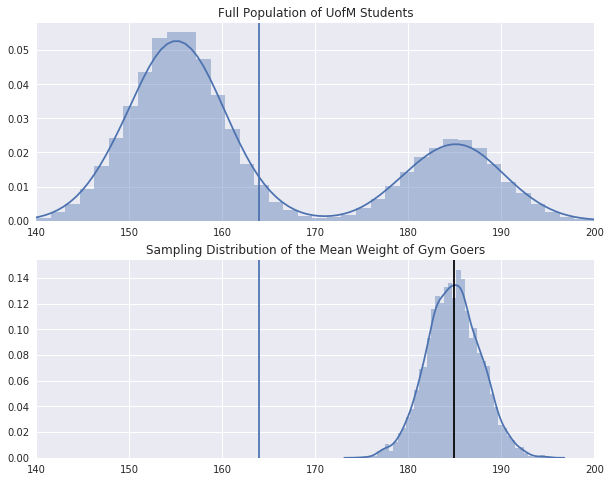

In [11]:
# Simulation parameters
numberSamps = 5000
sampSize = 3

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in xrange(numberSamps):
    random_students = np.random.choice(students_at_gym, sampSize)
    mean_distribution[i] = np.mean(random_students) 
    

# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plotting the population again
plt.subplot(2,1,1)
sns.distplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

# Plotting the sampling distribution
plt.subplot(2,1,2)
sns.distplot(mean_distribution)
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(students_at_gym), color = "black")
plt.xlim([140,200])

plt.show()